In [7]:
import pandas as pd

In [8]:
text_cln=pd.read_csv('E:/NLP_FOR_BUSINESS/messi.csv', encoding='ISO-8859-1')

In [9]:
text_cln.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,False,0,NaN,2019-09-25 15:29:59,False,NaN,1176881540996796417,NaN,"<a href=""http://twitter.com/download/iphone"" r...",thunderbeast01,1454,True,False,NaN,NaN
1,2,"Zsori, Puskas 2019: The Chilean who beat Quint...",False,0,NaN,2019-09-25 15:29:59,False,NaN,1176881540724379649,NaN,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",En24News,0,False,False,NaN,NaN
2,3,RT @LioneI10i_: Best footballer in the world ...,False,0,NaN,2019-09-25 15:29:56,False,NaN,1176881528128847873,NaN,"<a href=""http://twitter.com/download/android"" ...",disfrutoal10,880,True,False,NaN,NaN
3,4,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,False,0,NaN,2019-09-25 15:29:56,False,NaN,1176881526824460289,NaN,"<a href=""http://twitter.com/download/iphone"" r...",dariantorres34,1454,True,False,NaN,NaN
4,5,RT @UsherKomugisha: Sudan head coach Zdravko L...,False,0,NaN,2019-09-25 15:29:56,False,NaN,1176881526639927298,NaN,"<a href=""http://twitter.com/download/android"" ...",IdahWaringa,81,True,False,NaN,NaN


In [10]:
#Number of Words
text_cln['word_count'] = text_cln['text'].apply(lambda x: len(str(x).split(" ")))
text_cln[['text','word_count']].head()

,text,word_count
0,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,12
1,"Zsori, Puskas 2019: The Chilean who beat Quint...",11
2,RT @LioneI10i_: Best footballer in the world ...,15
3,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,12
4,RT @UsherKomugisha: Sudan head coach Zdravko L...,23


In [11]:
# Number of characters
text_cln['char_count'] = text_cln['text'].str.len() ## this also includes spaces
text_cln[['text','char_count']].head()

,text,char_count
0,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,85
1,"Zsori, Puskas 2019: The Chilean who beat Quint...",107
2,RT @LioneI10i_: Best footballer in the world ...,146
3,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,85
4,RT @UsherKomugisha: Sudan head coach Zdravko L...,162


In [12]:
# Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

text_cln['avg_word'] = text_cln['text'].apply(lambda x: avg_word(x))
text_cln[['text','avg_word']].head()

,text,avg_word
0,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,6.166667
1,"Zsori, Puskas 2019: The Chilean who beat Quint...",8.000000
2,RT @LioneI10i_: Best footballer in the world ...,6.611111
3,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,6.166667
4,RT @UsherKomugisha: Sudan head coach Zdravko L...,6.043478


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SVSS2195\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

text_cln['stopwords'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
text_cln[['text','stopwords']].head()

,text,stopwords
0,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,4
1,"Zsori, Puskas 2019: The Chilean who beat Quint...",2
2,RT @LioneI10i_: Best footballer in the world ...,2
3,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,4
4,RT @UsherKomugisha: Sudan head coach Zdravko L...,7


In [15]:
# Number of special characters
text_cln['tags'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
text_cln[['text','tags']].head()

,text,tags
0,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,1
1,"Zsori, Puskas 2019: The Chilean who beat Quint...",0
2,RT @LioneI10i_: Best footballer in the world ...,1
3,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,1
4,RT @UsherKomugisha: Sudan head coach Zdravko L...,1


In [16]:
# Number of numerics
text_cln['numerics'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
text_cln[['text','numerics']].tail()

,text,numerics
995,RT @utdarena: Cristiano Ronaldo is missing mor...,0
996,Messi after scoring his 50th hat-trick.\r\n\r\...,0
997,RT @utdarena: Cristiano Ronaldo is missing mor...,0
998,@magisterialD10S @madridistaSJ7 And WITH Messi...,2
999,RT @utdarena: Cristiano Ronaldo is missing mor...,0


In [17]:
# Number of Uppercase words
text_cln['upper_case'] = text_cln['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
text_cln[['text','upper_case']].head()

,text,upper_case
0,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,2
1,"Zsori, Puskas 2019: The Chilean who beat Quint...",0
2,RT @LioneI10i_: Best footballer in the world ...,1
3,RT @ESPNFC: Messi &amp; Ronaldo: just enjoy it...,2
4,RT @UsherKomugisha: Sudan head coach Zdravko L...,2


In [18]:
# Converting to Lower case
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text_cln['text'].head()

0    rt @espnfc: messi &amp; ronaldo: just enjoy it...
1    zsori, puskas 2019: the chilean who beat quint...
2    rt @lionei10i_: best footballer in the world ...
3    rt @espnfc: messi &amp; ronaldo: just enjoy it...
4    rt @usherkomugisha: sudan head coach zdravko l...
Name: text, dtype: object

In [19]:
# Removing Punctuation
text_cln['text'] = text_cln['text'].str.replace('[^\w\s]','')
text_cln['text'].head()

0    rt espnfc messi amp ronaldo just enjoy it whil...
1    zsori puskas 2019 the chilean who beat quinter...
2    rt lionei10i_ best footballer in the world now...
3    rt espnfc messi amp ronaldo just enjoy it whil...
4    rt usherkomugisha sudan head coach zdravko lug...
Name: text, dtype: object

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [21]:
# Stop Words removal 
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text_cln['text'].head()

0    rt espnfc messi amp ronaldo enjoy httpstcof2ag...
1    zsori puskas 2019 chilean beat quintero messi ...
2    rt lionei10i_ best footballer world andy rober...
3    rt espnfc messi amp ronaldo enjoy httpstcof2ag...
4    rt usherkomugisha sudan head coach zdravko lug...
Name: text, dtype: object

In [22]:
# Common word removal
freq = pd.Series(' '.join(text_cln['text']).split()).value_counts()[:7]
freq

messi        944
rt           852
ronaldo      445
lionel       411
ever         356
cristiano    309
games        290
dtype: int64

In [23]:
freq = list(freq.index)
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text_cln['text'].head()

0                  espnfc amp enjoy httpstcof2aga6by0j
1    zsori puskas 2019 chilean beat quintero httpst...
2    lionei10i_ best footballer world andy robertso...
3                  espnfc amp enjoy httpstcof2aga6by0j
4    usherkomugisha sudan head coach zdravko lugari...
Name: text, dtype: object

In [24]:
# Rare words removal
freq = pd.Series(' '.join(text_cln['text']).split()).value_counts()[-7:]
freq

breath_messi    1
ah              1
saturday        1
werent          1
able            1
oblak           1
marcus          1
dtype: int64

In [25]:
freq = list(freq.index)
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text_cln['text'].head()

0                  espnfc amp enjoy httpstcof2aga6by0j
1    zsori puskas 2019 chilean beat quintero httpst...
2    lionei10i_ best footballer world andy robertso...
3                  espnfc amp enjoy httpstcof2aga6by0j
4    usherkomugisha sudan head coach zdravko lugari...
Name: text, dtype: object

In [26]:
# Spelling correction
from textblob import TextBlob
text_cln['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                  espnfc amp enjoy httpstcof2aga6by0j
1    sort psoas 2019 clean beat quieter httpstco8om...
2    lionei10i_ best football world andy robertson ...
3                  espnfc amp enjoy httpstcof2aga6by0j
4    usherkomugisha sudan head coach zdravko lugari...
Name: text, dtype: object

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SVSS2195\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Tokenization
TextBlob(text_cln['text'][1]).words

WordList(['zsori', 'puskas', '2019', 'chilean', 'beat', 'quintero', 'httpstco8omv3doyn9', 'httpstcornjklkkamm'])

In [29]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
text_cln['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                  espnfc amp enjoy httpstcof2aga6by0j
1    zsori puska 2019 chilean beat quintero httpstc...
2    lionei10i_ best footbal world andi robertson b...
3                  espnfc amp enjoy httpstcof2aga6by0j
4    usherkomugisha sudan head coach zdravko lugari...
Name: text, dtype: object

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SVSS2195\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# Lemmatization
from textblob import Word
text_cln['text'] = text_cln['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
text_cln['text'].head()

0                  espnfc amp enjoy httpstcof2aga6by0j
1    zsori puskas 2019 chilean beat quintero httpst...
2    lionei10i_ best footballer world andy robertso...
3                  espnfc amp enjoy httpstcof2aga6by0j
4    usherkomugisha sudan head coach zdravko lugari...
Name: text, dtype: object

In [28]:
# N-grams
TextBlob(text_cln['text'][1]).ngrams(3)

[WordList(['zsori', 'puskas', '2019']),
 WordList(['puskas', '2019', 'chilean']),
 WordList(['2019', 'chilean', 'beat']),
 WordList(['chilean', 'beat', 'quintero']),
 WordList(['beat', 'quintero', 'httpstco8omv3doyn9']),
 WordList(['quintero', 'httpstco8omv3doyn9', 'httpstcornjklkkamm'])]

# TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [29]:
# Term frequency
tf1 = (text_cln['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,httpstcornjklkkamm,1
1,zsori,1
2,quintero,1
3,httpstco8omv3doyn9,1
4,puskas,1
5,2019,1
6,beat,1
7,chilean,1


# IDF = log(N/n)

In [30]:
import numpy as np

In [31]:
# Inverse Document Frequency
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(text_cln.shape[0]/(len(text_cln[text_cln['text'].str.contains(word)])))

tf1

,words,tf,idf
0,httpstcornjklkkamm,1,6.907755
1,zsori,1,6.907755
2,quintero,1,6.907755
3,httpstco8omv3doyn9,1,6.907755
4,puskas,1,6.214608
5,2019,1,5.521461
6,beat,1,5.115996
7,chilean,1,6.907755


In [32]:
# Term Frequency – Inverse Document Frequency (TF-IDF)

tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,httpstcornjklkkamm,1,6.907755,6.907755
1,zsori,1,6.907755,6.907755
2,quintero,1,6.907755,6.907755
3,httpstco8omv3doyn9,1,6.907755,6.907755
4,puskas,1,6.214608,6.214608
5,2019,1,5.521461,5.521461
6,beat,1,5.115996,5.115996
7,chilean,1,6.907755,6.907755


In [39]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

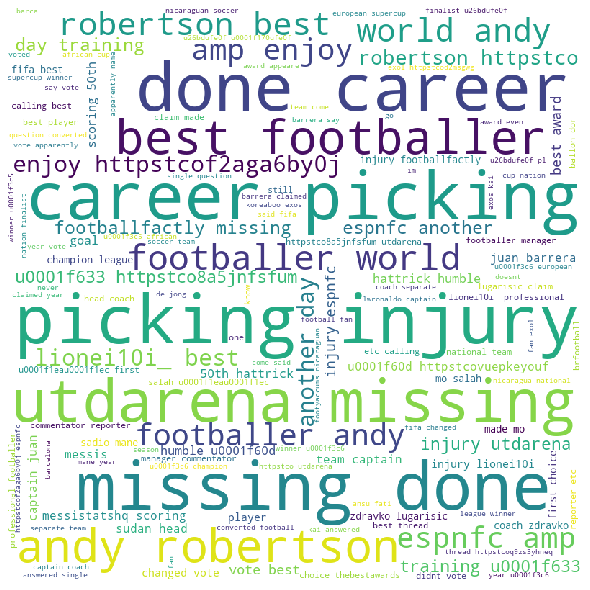

In [40]:
tweet_words= ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in text_cln.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        tweet_words = tweet_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tweet_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [74]:
tweet_words

'espnfc amp enjoy httpstcof2aga6by0j zsori puskas 2019 chilean beat quintero httpstco8omv3doyn9 httpstcornjklkkamm lionei10i_ best footballer world andy robertson best footballer andy robertson httpstco espnfc amp enjoy httpstcof2aga6by0j usherkomugisha sudan head coach zdravko lugarisic claim made mo salah u0001f1eau0001f1ec first choice thebestawards shock beinsportsusa griezmann im bad right three goal far better yes keep working u0001f535u0001f534 httpst footballfactly missing done career picking injury etoo god everything arranged barcelona httpstco0wdbbacskq utdarena missing done career picking injury jacintangobese shame fan still cry papa perez rob feel robbed u0001f923u0001f923u0001f923u0001f923u0001f923u0001f923u0001f923u0001f923 httpstco0cazritquh brfootball fifas thebest men player uefas men player year virgilvdijk ballon dor grab yung__naan tbh really think gareth bale better every way he stronger faster footb barcaworldwide best footballer world andy robertson best footba

In [54]:
tweet_words

In [75]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [76]:
print( word_count(tweet_words))

{'espnfc': 120, 'amp': 77, 'enjoy': 59, 'httpstcof2aga6by0j': 58, 'zsori': 1, 'puskas': 2, '2019': 4, 'chilean': 1, 'beat': 6, 'quintero': 1, 'httpstco8omv3doyn9': 1, 'httpstcornjklkkamm': 1, 'lionei10i_': 100, 'best': 255, 'footballer': 151, 'world': 103, 'andy': 127, 'robertson': 128, 'httpstco': 58, 'usherkomugisha': 7, 'sudan': 26, 'head': 25, 'coach': 36, 'zdravko': 25, 'lugarisic': 16, 'claim': 15, 'made': 21, 'mo': 17, 'salah': 18, 'u0001f1eau0001f1ec': 16, 'first': 25, 'choice': 16, 'thebestawards': 15, 'shock': 8, 'beinsportsusa': 2, 'griezmann': 5, 'im': 11, 'bad': 3, 'right': 5, 'three': 19, 'goal': 33, 'far': 3, 'better': 25, 'yes': 7, 'keep': 2, 'working': 2, 'u0001f535u0001f534': 8, 'httpst': 7, 'footballfactly': 56, 'missing': 286, 'done': 281, 'career': 281, 'picking': 287, 'injury': 298, 'etoo': 4, 'god': 3, 'everything': 3, 'arranged': 1, 'barcelona': 16, 'httpstco0wdbbacskq': 1, 'utdarena': 221, 'jacintangobese': 1, 'shame': 3, 'fan': 36, 'still': 15, 'cry': 2, 'papa

In [77]:
from collections import Counter

In [78]:
Counter(tweet_words.split()).most_common()

[('injury', 298),
 ('picking', 287),
 ('missing', 286),
 ('done', 281),
 ('career', 281),
 ('best', 255),
 ('utdarena', 221),
 ('footballer', 151),
 ('robertson', 128),
 ('andy', 127),
 ('espnfc', 120),
 ('world', 103),
 ('lionei10i_', 100),
 ('vote', 80),
 ('amp', 77),
 ('year', 70),
 ('another', 62),
 ('day', 61),
 ('award', 61),
 ('player', 60),
 ('enjoy', 59),
 ('fifa', 59),
 ('httpstcof2aga6by0j', 58),
 ('httpstco', 58),
 ('u0001f633', 57),
 ('footballfactly', 56),
 ('training', 56),
 ('httpstco8a5jnfsfum', 56),
 ('team', 50),
 ('1', 43),
 ('captain', 41),
 ('2', 39),
 ('football', 39),
 ('coach', 36),
 ('fan', 36),
 ('goal', 33),
 ('didnt', 32),
 ('u0001f3c6', 30),
 ('one', 30),
 ('season', 29),
 ('say', 28),
 ('winner', 28),
 ('3', 27),
 ('u26bdufe0f', 27),
 ('sudan', 26),
 ('he', 26),
 ('name', 26),
 ('u0001f60d', 26),
 ('head', 25),
 ('zdravko', 25),
 ('first', 25),
 ('better', 25),
 ('top', 25),
 ('scoring', 25),
 ('50th', 25),
 ('hattrick', 25),
 ('humble', 25),
 ('httpstcov